# <b><span style='color:#F1A424'>AutoML - Regression - Fish Weight Prediction </span> </b>

### Disclaimer
The sample code (“Sample Code”) provided is not covered by any Teradata agreements. Please be aware that Teradata has no control over the model responses to such sample code and such response may vary. The use of the model by Teradata is strictly for demonstration purposes and does not constitute any form of certification or endorsement. The sample code is provided “AS IS” and any express or implied warranties, including the implied warranties of merchantability and fitness for a particular purpose, are disclaimed. In no event shall Teradata be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) sustained by you or a third party, however caused and on any theory of liability, whether in contract, strict liability, or tort arising in any way out of the use of this sample code, even if advised of the possibility of such damage.

## <b> Problem overview:</b>
    

**Dataset used : Fish Weight Dataset**

**Features**:

- `Species`: Species name of fish
- `Length1`: Vertical length in cm
- `Length2`: Diagonal length in cm
- `Length3`: Cross length in cm
- `Height`: Height in cm
- `Width`: Diagonal width in cm

**Target Variable**:

- `Weight`: Weight of fish in gram

        
**Objective**:

The primary objective is typically to build a model that can accurately predict weight of fish in gram.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Train test split with training size 0.7.
- Outlier filteration with 'tukey' method and imputation with median for outlier in 'Length2' feature.
- Feature scaling with 'std' method.
- Replacement of customized value in hyperparameter 'max_depth' for 'xgboost' model.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','fish')

In [5]:
# Fetching in teradata dataframe
fish_df = DataFrame("fish")

In [6]:
# first 5 rows
fish_df.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Bream,850,32.8,36.0,41.6,16.8896,6.1984
Bream,700,31.9,35.0,40.5,16.2405,5.589
Bream,390,27.6,30.0,35.0,12.67,4.69
Bream,242,23.2,25.4,30.0,11.52,4.02
Bream,714,32.7,36.0,41.5,16.517,5.8515
Bream,955,35.0,38.5,44.0,18.084,6.292
Bream,700,30.4,33.0,38.5,14.938,5.1975
Bream,600,29.4,32.0,37.2,15.438,5.58
Bream,430,26.5,29.0,34.0,12.444,5.134
Bream,575,31.3,34.0,39.5,15.1285,5.5695


In [7]:
# fish_df dataset
fish_df.shape

(159, 7)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
fish_df_sample = fish_df.sample(frac = [0.8, 0.2])

In [9]:
fish_df_sample.head()

Species,Weight,Length1,Length2,Length3,Height,Width,sampleid
Bream,500,28.5,30.7,36.2,14.2266,4.9594,1
Bream,500,29.1,31.5,36.4,13.7592,4.368,1
Bream,340,29.5,32.0,37.3,13.9129,5.0728,1
Bream,600,29.4,32.0,37.2,14.9544,5.1708,1
Bream,700,30.4,33.0,38.5,14.938,5.1975,2
Bream,610,30.9,33.5,38.6,15.633,5.1338,1
Bream,700,30.4,33.0,38.3,14.8604,5.2854,2
Bream,475,28.4,31.0,36.2,14.2628,5.1042,1
Bream,450,27.6,30.0,35.1,14.0049,4.8438,2
Bream,450,26.8,29.7,34.7,13.6024,4.9274,1


In [10]:
# Fetching train and test data
fish_df_train= fish_df_sample[fish_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
fish_df_test = fish_df_sample[fish_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
fish_df_train.shape

(127, 7)

In [12]:
# test data shape
fish_df_test.shape

(32, 7)

In [13]:
#train dataset
fish_df_train.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Bream,500,28.7,31.0,36.2,14.3714,4.8146
Bream,600,29.4,32.0,37.2,14.9544,5.1708
Bream,610,30.9,33.5,38.6,15.633,5.1338
Bream,575,31.3,34.0,39.5,15.1285,5.5695
Bream,700,31.9,35.0,40.5,16.2405,5.589
Bream,725,31.8,35.0,40.9,16.36,6.0532
Bream,620,31.5,34.5,39.7,15.5227,5.2801
Bream,500,29.1,31.5,36.4,13.7592,4.368
Bream,475,28.4,31.0,36.2,14.2628,5.1042
Bream,500,26.8,29.7,34.5,14.1795,5.2785


In [14]:
# test dataset
fish_df_test.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Bream,700,30.4,33.0,38.3,14.8604,5.2854
Bream,650,31.0,33.5,38.7,14.4738,5.7276
Bream,340,23.9,26.5,31.1,12.3778,4.6961
Bream,680,31.8,35.0,40.6,15.4686,6.1306
Perch,197,23.5,25.6,27.0,6.561,4.239
Perch,170,21.5,23.5,25.0,6.275,3.725
Parkki,140,19.0,20.7,23.2,8.5376,3.2944
Bream,685,31.4,34.0,39.2,15.9936,5.3704
Bream,700,30.4,33.0,38.5,14.938,5.1975
Bream,450,27.6,30.0,35.1,14.0049,4.8438


In [15]:
AutoML.generate_custom_config("custom_fish_weight")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  2



Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Data Imbalance Handling

Index 2: Customize Outlier Handling

Index 3: Customize Feature Scaling

Index 4: Back to main menu

Index 5: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  2,3



Customizing Outlier Handling ...

Available outlier detection methods with corresponding indices:
Index 1: percentile
Index 2: tukey
Index 3: carling



Enter the corresponding index oulier handling method:  2

Enter the feature or list of features for outlier handling:  Length2



Available outlier replacement methods with corresponding indices:
Index 1: delete
Index 2: median
Index 3: Any Numeric Value



Enter the index of corresponding replacement method for feature Length2:  2



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  0



Customization of outlier handling has been completed successfully.

Available feature scaling methods with corresponding indices:
Index 1: maxabs
Index 2: mean
Index 3: midrange
Index 4: range
Index 5: rescale
Index 6: std
Index 7: sum
Index 8: ustd



Enter the corresponding index feature scaling method:  6



Available options for generic arguments: 
Index 0: Default
Index 1: volatile
Index 2: persist



Enter the indices for generic arguments :  0



Customization of feature scaling has been completed successfully.

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Data Imbalance Handling

Index 2: Customize Outlier Handling

Index 3: Customize Feature Scaling

Index 4: Back to main menu

Index 5: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  4



Customization of data preparation phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  3



Customizing Model Training Phase ...

Available options for customization of model training phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Model Hyperparameter

Index 2: Back to main menu

Index 3: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in model training phase:  1



Customizing Model Hyperparameter ...

Available models for hyperparameter tuning with corresponding indices:
Index 1: decision_forest
Index 2: xgboost
Index 3: knn
Index 4: glm
Index 5: svm

Available hyperparamters update methods with corresponding indices:
Index 1: ADD
Index 2: REPLACE



Enter the list of model indices for performing hyperparameter tuning:  1



Available hyperparameters for model 'decision_forest' with corresponding indices:
Index 1: min_impurity
Index 2: max_depth
Index 3: min_node_size
Index 4: num_trees



Enter the list of hyperparameter indices for model 'decision_forest':  3

Enter the index of corresponding update method for hyperparameters 'min_node_size' for model 'decision_forest':  1

Enter the list of value for hyperparameter 'min_node_size' for model 'decision_forest':  2, 3



Customization of model hyperparameter has been completed successfully.

Available options for customization of model training phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Model Hyperparameter

Index 2: Back to main menu

Index 3: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in model training phase:  3



Customization of model training phase has been completed successfully.

Process of generating custom config file for AutoML has been completed successfully.

'custom_fish_weight.json' file is generated successfully under the current working directory.


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [16]:
# Creating AutoML instance
# Excluded 'glm' and 'xgboost' from model training.
# Keeping early stopping timer threshold to 200 sec
# and verbose level 2 for detailed loggging
# Using custom config json for custom run

aml = AutoML(task_type="Regression", 
             exclude=['glm', 'xgboost'],
             max_runtime_secs=200,
             verbose=2,
             custom_config_file='custom_fish_weight.json')


Received below input for customization : 
{
    "OutlierFilterIndicator": true,
    "OutlierFilterMethod": "tukey",
    "OutlierFilterParam": {
        "Length2": {
            "replacement_value": "median"
        }
    },
    "FeatureScalingIndicator": true,
    "FeatureScalingParam": {
        "FeatureScalingMethod": "std"
    },
    "HyperparameterTuningIndicator": true,
    "HyperparameterTuningParam": {
        "decision_forest": {
            "min_node_size": {
                "Method": "ADD",
                "Value": [
                    2,
                    3
                ]
            }
        }
    }
}


Feature Exploration started ...

Data Overview:
Total Rows in the data: 127
Total Columns in the data: 7

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
Height,FLOAT,127,0,None,0,127,0,0.0,100.0
Length3,FLOAT,127,0,None,0,127,0,0.0,100.0
Length2,FLOAT,127,0,None,0,127,0,0.0,100.0
Species,VARCHAR(20) CHARACTER SET LATIN,127,0,0,None,None,None,0.0,100.0
Width,FLOAT,127,0,None,0,127,0,0.0,100.0
Length1,FLOAT,127,0,None,0,127,0,0.0,100.0
Weight,INTEGER,127,0,None,0,127,0,0.0,100.0


         Weight  Length1  Length2  Length3   Height    Width
func                                                        
min       6.000    9.300    9.800   10.800    1.739    1.048
std     367.355   10.090   10.818   11.694    4.320    1.712
25%     120.000   19.000   21.000   22.800    6.032    3.350
50%     300.000   25.400   27.500   30.600    8.323    4.335
75%     667.500   33.600   36.200   40.150   12.143    6.011
max    1650.000   59.000   63.400   68.000   18.957    8.142
mean    411.283   26.509   28.697   31.531    9.117    4.469
count   127.000  127.000  127.000  127.000  127.000  127.000

Statistics of Data:


func,Weight,Length1,Length2,Length3,Height,Width
50%,300,25.4,27.5,30.6,8.323,4.335
count,127,127,127,127,127,127
mean,411.283,26.509,28.697,31.531,9.117,4.469
min,6,9.3,9.8,10.8,1.739,1.048
max,1650,59,63.4,68,18.957,8.142
75%,667.5,33.6,36.2,40.15,12.143,6.011
25%,120,19,21,22.8,6.032,3.35
std,367.355,10.09,10.818,11.694,4.32,1.712



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
Species                   7         

No Futile columns found.

Target Column Distribution:


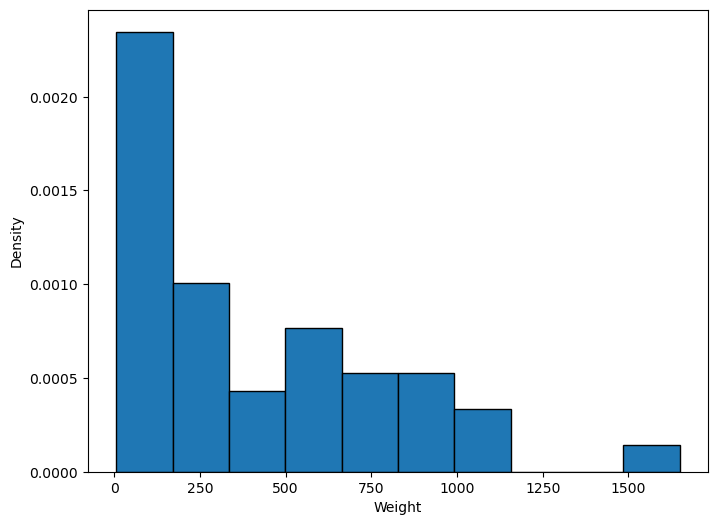

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    Length3           0.787402
1     Weight           2.362205
2    Length2           2.362205
3    Length1           2.362205


Analysis completed. No action taken.                                                    


Skipping customized anti-select columns.                                                


Analysis indicates all categorical columns are significant. No action Needed.            


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


No information provided for Variable-Width Transformation.                               
Skipping customized string manipulation.                                                 


AutoML will proceed with default encoding technique.                                     


['Species']


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
0,1,0,0,0,0,0,55,13.5,14.7,16.5,6.8475,2.3265,48
0,1,0,0,0,0,0,145,19.8,21.5,24.1,9.7364,3.1571,72
0,1,0,0,0,0,0,60,14.3,15.5,17.4,6.5772,2.3142,80
0,0,1,0,0,0,0,40,13.8,15.0,16.0,3.824,2.432,88
0,0,1,0,0,0,0,900,36.5,39.0,41.4,11.1366,7.4934,104
0,0,1,0,0,0,0,260,25.4,27.5,28.9,7.1672,4.335,112
1,0,0,0,0,0,0,955,35.0,38.5,44.0,18.084,6.292,26
1,0,0,0,0,0,0,925,36.2,39.5,45.3,18.7542,6.7497,42
1,0,0,0,0,0,0,620,31.5,34.5,39.7,15.5227,5.2801,50
1,0,0,0,0,0,0,700,31.9,35.0,40.5,16.2405,5.589,58


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    Length2           9.448819
1    Length3           9.448819
2         id           9.448819
3     Weight           8.661417
4      Width           9.448819
5    Length1           9.448819
6     Height           8.661417


['Species_1', 'Species_6', 'Species_3', 'Species_2', 'Species_5', 'Species_0', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


['Length1', 'Length2', 'Length3', 'Height', 'Width']


Weight,id,Species_1,Species_6,Species_3,Species_2,Species_5,Species_0,Length1,Length2,Length3,Height,Width
145,12,0,0,0,0,0,0,-0.5979725609606392,-0.7538338473937253,-0.6207961721031394,-0.5771105241201765,-0.5401085657189114
8,15,0,0,0,0,1,0,-1.563174864219827,-0.08238148523545209,-1.6253056266692452,-1.6589858136754314,-1.8665706144581142
170,16,1,0,0,0,0,0,-0.7472306490935033,-0.9125407693584081,-0.7152372319341409,0.0647366175084876,-0.6206600929427982
575,18,0,0,0,0,0,1,0.4766856735959825,0.7111531245879616,0.6842075637434255,1.396834926543756,0.645124495332996
345,21,0,0,1,0,0,0,0.94436101641229,1.2605232390810943,0.8129908271493366,-0.6323928944157701,-0.28848763788417897
12,23,0,0,0,0,1,0,-1.4338178545046782,-1.8525740763799905,-1.5222790159445165,-1.5895517142877755,-1.883806530763662
290,20,0,0,0,0,0,0,-0.24970368865062295,-0.265504856733163,-0.20010417831049684,-0.055913263355204225,0.01624805244316045
500,13,0,0,1,0,0,0,1.5413933689437465,2.0540578489045083,1.4139793897102546,-0.5013325461740096,0.25028131057835407
720,10,0,0,0,0,0,1,0.5463394480579857,0.8332353722531023,0.778648623574427,1.683424868895818,0.9502705646199912
273,8,1,0,0,0,0,0,-0.34920908073919904,-0.3875871043983036,-0.3031307890352256,0.4579176622337684,-0.19058294322341385


['Length1', 'Length2', 'Length3', 'Height', 'Width']


['r_Length1', 'r_Length2', 'r_Length3', 'r_Height', 'r_Width']


id,Weight,r_Length1,r_Length2,r_Length3,r_Height,r_Width
12,145,-0.5979725609606392,-0.7538338473937253,-0.6207961721031394,-0.5771105241201765,-0.5401085657189114
15,8,-1.563174864219827,-0.08238148523545209,-1.6253056266692452,-1.6589858136754314,-1.8665706144581142
16,170,-0.7472306490935033,-0.9125407693584081,-0.7152372319341409,0.0647366175084876,-0.6206600929427982
18,575,0.4766856735959825,0.7111531245879616,0.6842075637434255,1.396834926543756,0.645124495332996
21,345,0.94436101641229,1.2605232390810943,0.8129908271493366,-0.6323928944157701,-0.28848763788417897
23,12,-1.4338178545046782,-1.8525740763799905,-1.5222790159445165,-1.5895517142877755,-1.883806530763662
20,290,-0.24970368865062295,-0.265504856733163,-0.20010417831049684,-0.055913263355204225,0.01624805244316045
13,500,1.5413933689437465,2.0540578489045083,1.4139793897102546,-0.5013325461740096,0.25028131057835407
10,720,0.5463394480579857,0.8332353722531023,0.778648623574427,1.683424868895818,0.9502705646199912
8,273,-0.34920908073919904,-0.3875871043983036,-0.3031307890352256,0.4579176622337684,-0.19058294322341385


['Length1', 'Length2', 'Length3', 'Height', 'Width']


Species_4,Weight,id,Species_1,Species_6,Species_3,Species_2,Species_5,Species_0,Length1,Length2,Length3,Height,Width
0,60,80,1,0,0,0,0,0,-1.214905991909811,-1.5473684572171407,-1.2131991837703302,-0.5902862718955444,-1.2633135437639396
0,900,104,0,0,0,1,0,0,0.9941137124565775,1.3215643629136635,0.8473330307242455,0.4692111603269419,1.773021753164407
0,260,112,0,0,0,1,0,0,-0.11039613972661692,-0.08238148523545342,-0.22586083099167936,-0.45318413455044043,-0.07860811280301856
0,700,120,0,0,0,1,0,0,0.7453502322351374,0.9553176199182418,0.581180953018696,0.34663255448026,1.3318057459686483
0,85,144,0,0,0,1,0,0,-0.8268349627643645,-0.997998342724008,-0.9041193515961438,-0.9377356206385944,-0.9949257041489805
0,180,152,0,0,0,1,0,0,-0.3492090807391993,-0.38758710439830496,-0.4319140524411368,-0.6222845164928679,-0.46055367311133216
0,620,50,0,0,0,0,0,1,0.4965867520136972,0.7721942484205309,0.70137866553088,1.4884377444106038,0.475462108298113
0,430,74,0,0,0,0,0,1,-0.0009402084291831114,0.1007418862622575,0.2120022645884181,0.7730202016235336,0.3898101568613601
0,500,82,0,0,0,0,0,1,0.19807057574796902,0.3082817072929965,0.4008843842504211,1.187254557608927,0.2874499192100449
0,290,90,0,0,0,0,0,1,-0.24970368865062326,-0.22888018243362207,-0.02839316043594913,0.7813857557666246,-0.09584402910856633


['col_0', 'col_1', 'col_2', 'col_3', 'col_4']


                                                                                          
Completed customized hyperparameter update.


response_column : Weight                                                                                                                              
name : knn
model_type : Regression
k : (3, 5, 6, 8, 10, 12)
id_column : id
voting_weight : 1.0
Total number of models for knn : 6
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : Weight
name : svm
model_type : regression
lambda1 : (0.001, 0.02, 0.1)
alpha : (0.15, 0.85)
tolerance : (0.001, 0.01)
learning_rate : ('Invtime', 'Adaptive', 'constant')
initial_eta : (0.05, 0.1)
momentum : (0.65, 0.8, 0.95)
nesterov : True
intercept : True
iter_num_no_change : (5, 10, 50)
local_sgd_iterations  : (10, 20)
iter_max : (300, 200, 400)
batch_size : (10, 50, 60, 80)
Total number of models for svm : 15552
-------------------------------------------------------------------------------

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,KNN_8,pca,34.910813,2759.670403,0.019271,10.879343,-7.051822,52.532565,0.138822,135.919448,0.977742,0.982062,4.680425,0.018466,0.976822
1,2,KNN_9,lasso,36.298574,2943.061962,0.028948,13.166795,-8.834646,54.249995,0.170142,178.397216,0.976263,0.978359,5.682999,0.026512,0.973992
2,3,KNN_0,lasso,39.569375,3461.565226,0.034250,14.011865,-9.437544,58.835068,0.185066,177.819179,0.972081,0.976439,6.684804,0.030901,0.969410
3,4,KNN_4,rfe,40.567254,4041.215337,0.011358,8.541726,-2.070956,63.570554,0.106572,169.362975,0.967405,0.969199,5.477642,0.011537,0.966059
4,5,DECISIONFOREST_2,pca,44.453526,6103.874480,0.066941,21.573937,-15.618221,78.127297,0.258730,225.000000,0.950769,0.951051,9.902976,0.064418,0.948735
5,6,DECISIONFOREST_1,rfe,58.656718,9306.154488,0.227963,30.185571,-7.546338,96.468412,0.477454,284.000000,0.924941,0.929692,19.275763,0.332902,0.921839
6,7,DECISIONFOREST_0,lasso,72.118257,14414.039103,0.239260,32.543726,-8.966992,120.058482,0.489142,326.000000,0.883743,0.891115,26.511601,0.343272,0.872623
7,8,DECISIONFOREST_3,lasso,215.048077,72849.239519,1.441583,296.500023,-258.155798,269.905983,1.200659,571.750000,0.412432,0.487531,176.708049,0.898237,0.356229
8,9,SVM_0,lasso,430.189726,308799.919582,8.573098,99.689859,99.689859,555.697687,2.927985,998.894373,-1.490638,0.001997,4780.804185,1013.369464,-1.728873
9,10,SVM_1,rfe,430.283054,308900.332357,2.951653,99.748896,99.748896,555.788028,1.718038,999.017888,-1.491447,0.001835,4900.749194,1188.459504,-1.594400


In [17]:
# Fitting train data
aml.fit(fish_df_train, fish_df_train.Weight)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,KNN_8,pca,34.910813,2759.670403,0.019271,10.879343,-7.051822,52.532565,0.138822,135.919448,0.977742,0.982062,4.680425,0.018466,0.976822
1,2,KNN_9,lasso,36.298574,2943.061962,0.028948,13.166795,-8.834646,54.249995,0.170142,178.397216,0.976263,0.978359,5.682999,0.026512,0.973992
2,3,KNN_0,lasso,39.569375,3461.565226,0.034250,14.011865,-9.437544,58.835068,0.185066,177.819179,0.972081,0.976439,6.684804,0.030901,0.969410
3,4,KNN_4,rfe,40.567254,4041.215337,0.011358,8.541726,-2.070956,63.570554,0.106572,169.362975,0.967405,0.969199,5.477642,0.011537,0.966059
4,5,DECISIONFOREST_2,pca,44.453526,6103.874480,0.066941,21.573937,-15.618221,78.127297,0.258730,225.000000,0.950769,0.951051,9.902976,0.064418,0.948735
5,6,DECISIONFOREST_1,rfe,58.656718,9306.154488,0.227963,30.185571,-7.546338,96.468412,0.477454,284.000000,0.924941,0.929692,19.275763,0.332902,0.921839
6,7,DECISIONFOREST_0,lasso,72.118257,14414.039103,0.239260,32.543726,-8.966992,120.058482,0.489142,326.000000,0.883743,0.891115,26.511601,0.343272,0.872623
7,8,DECISIONFOREST_3,lasso,215.048077,72849.239519,1.441583,296.500023,-258.155798,269.905983,1.200659,571.750000,0.412432,0.487531,176.708049,0.898237,0.356229
8,9,SVM_0,lasso,430.189726,308799.919582,8.573098,99.689859,99.689859,555.697687,2.927985,998.894373,-1.490638,0.001997,4780.804185,1013.369464,-1.728873
9,10,SVM_1,rfe,430.283054,308900.332357,2.951653,99.748896,99.748896,555.788028,1.718038,999.017888,-1.491447,0.001835,4900.749194,1188.459504,-1.594400


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,KNN_8,pca,34.910813,2759.670403,0.019271,10.879343,-7.051822,52.532565,0.138822,135.919448,0.977742,0.982062,4.680425,0.018466,0.976822


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [20]:
aml.model_hyperparameters(rank=2)

{'response_column': 'Weight',
 'name': 'knn',
 'model_type': 'Regression',
 'k': 5,
 'id_column': 'id',
 'voting_weight': 1.0,
 'persist': False}

In [21]:
aml.model_hyperparameters(rank=5)

{'response_column': 'Weight',
 'name': 'decision_forest',
 'tree_type': 'Regression',
 'min_impurity': 0.0,
 'max_depth': 5,
 'min_node_size': 1,
 'num_trees': -1,
 'seed': 42,
 'persist': False}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [22]:
# Generating prediction on test data
prediction = aml.predict(fish_df_test)

Data Transformation started ...


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
1,0,0,0,0,0,0,685,31.4,34.0,39.2,15.9936,5.3704,50
1,0,0,0,0,0,0,700,30.4,33.0,38.5,14.938,5.1975,34
1,0,0,0,0,0,0,450,27.6,30.0,35.1,14.0049,4.8438,18
1,0,0,0,0,0,0,340,23.9,26.5,31.1,12.3778,4.6961,10
0,0,0,0,0,0,1,270,23.6,26.0,28.7,8.3804,4.2476,45
0,1,0,0,0,0,0,140,19.0,20.7,23.2,8.5376,3.2944,8
0,0,1,0,0,0,0,5,7.5,8.4,8.8,2.112,1.408,16
0,0,1,0,0,0,0,135,20.0,22.0,23.5,5.875,3.525,32
0,0,1,0,0,0,0,110,20.0,22.0,23.5,5.5225,3.995,40
0,0,1,0,0,0,0,265,25.4,27.5,28.9,7.0516,4.335,48


id,Species_1,Species_6,Species_3,Species_2,Species_5,Species_0,Length1,Length2,Length3,Height,Width,Weight
20,0,0,0,0,0,0,20.4,22.0,24.7,5.8045,3.7544,150
50,0,0,0,0,0,1,31.4,34.0,39.2,15.9936,5.3704,685
34,0,0,0,0,0,1,30.4,33.0,38.5,14.938,5.1975,700
18,0,0,0,0,0,1,27.6,30.0,35.1,14.0049,4.8438,450
45,0,1,0,0,0,0,23.6,26.0,28.7,8.3804,4.2476,270
8,1,0,0,0,0,0,19.0,20.7,23.2,8.5376,3.2944,140
16,0,0,0,1,0,0,7.5,8.4,8.8,2.112,1.408,5
32,0,0,0,1,0,0,20.0,22.0,23.5,5.875,3.525,135
40,0,0,0,1,0,0,20.0,22.0,23.5,5.5225,3.995,110
48,0,0,0,1,0,0,25.4,27.5,28.9,7.0516,4.335,265


Weight,id,Species_1,Species_6,Species_3,Species_2,Species_5,Species_0,Length1,Length2,Length3,Height,Width
150,20,0,0,0,0,0,0,-0.607923100169497,-0.7538338473937253,-0.58645396852823,-0.7698435965168361,-0.4189881470547555
685,50,0,0,0,0,0,1,0.4866362128048399,0.7111531245879616,0.6584509110622435,1.5978638401323144,0.5284009940937249
700,34,0,0,0,0,0,1,0.3871308207162638,0.5890708769228211,0.5983520548061515,1.3525672025365658,0.42703739105871713
450,18,0,0,0,0,0,1,0.10851572286825108,0.22282413392739936,0.30644332441941996,1.1357366866777239,0.21967876530115688
270,45,0,1,0,0,0,0,-0.28950584548605324,-0.265504856733163,-0.24303193277913385,-0.17126495992827123,-0.12984685719434041
140,8,1,0,0,0,0,0,-0.7472306490935033,-0.9125407693584081,-0.7152372319341409,-0.13473537350344025,-0.6886657491143476
5,16,0,0,0,1,0,0,-1.8915426581121282,-2.4141524156396375,-1.9515565606308864,-1.6278938374436096,-1.7945784198213361
135,32,0,0,0,1,0,0,-0.6477252570049272,-0.7538338473937253,-0.6894805792529587,-0.753461052986616,-0.5534751946905608
110,40,0,0,0,1,0,0,-0.6477252570049272,-0.7538338473937253,-0.6894805792529587,-0.8353737706377163,-0.2779350360644557
265,48,0,0,0,1,0,0,-0.11039613972661659,-0.08238148523545209,-0.2258608309916791,-0.4800468584099224,-0.07860811280301806


id,Length1,Length2,Length3,Height,Width,Weight
18,27.6,30.0,35.1,14.0049,4.8438,450
45,23.6,26.0,28.7,8.3804,4.2476,270
8,19.0,20.7,23.2,8.5376,3.2944,140
16,7.5,8.4,8.8,2.112,1.408,5
40,20.0,22.0,23.5,5.5225,3.995,110
48,25.4,27.5,28.9,7.0516,4.335,265
28,22.0,24.0,27.2,7.5344,3.8352,169
36,23.6,25.2,27.9,7.0866,3.906,180
20,20.4,22.0,24.7,5.8045,3.7544,150
12,19.0,20.5,22.8,6.4752,3.3516,0


id,Weight,r_Length1,r_Length2,r_Length3,r_Height,r_Width
18,450,0.10851572286825108,0.22282413392739936,0.30644332441941996,1.1357366866777239,0.21967876530115688
45,270,-0.28950584548605324,-0.265504856733163,-0.24303193277913385,-0.17126495992827123,-0.12984685719434041
8,140,-0.7472306490935033,-0.9125407693584081,-0.7152372319341409,-0.13473537350344025,-0.6886657491143476
16,5,-1.8915426581121282,-2.4141524156396375,-1.9515565606308864,-1.6278938374436096,-1.7945784198213361
40,110,-0.6477252570049272,-0.7538338473937253,-0.6894805792529587,-0.8353737706377163,-0.2779350360644557
48,265,-0.11039613972661659,-0.08238148523545209,-0.2258608309916791,-0.4800468584099224,-0.07860811280301806
28,169,-0.4487144728277751,-0.5096693520634441,-0.3718151961850449,-0.36785548229091186,-0.3716186899973315
36,180,-0.28950584548605324,-0.36317065486527556,-0.31171633992895315,-0.47191368077080603,-0.33011178950642023
20,150,-0.607923100169497,-0.7538338473937253,-0.58645396852823,-0.7698435965168361,-0.4189881470547555
12,0,-0.7472306490935033,-0.9369572188914362,-0.7495794355090504,-0.6139886753009696,-0.6551319255538941


Species_4,Weight,id,Species_6,Species_1,Species_3,Species_2,Species_5,Species_0,Length1,Length2,Length3,Height,Width
1,150,20,0,0,0,0,0,0,-0.6079231001694972,-0.7538338473937268,-0.5864539685282301,-0.7698435965168356,-0.4189881470547559
0,685,50,0,0,0,0,0,1,0.48663621280483943,0.7111531245879605,0.6584509110622431,1.5978638401323149,0.5284009940937242
0,700,34,0,0,0,0,0,1,0.38713082071626337,0.5890708769228199,0.5983520548061511,1.3525672025365663,0.4270373910587165
0,450,18,0,0,0,0,0,1,0.1085157228682507,0.2228241339273981,0.30644332441941957,1.1357366866777243,0.2196787653011563
0,270,45,1,0,0,0,0,0,-0.28950584548605357,-0.2655048567331643,-0.2430319327791341,-0.17126495992827082,-0.1298468571943409
0,140,8,0,1,0,0,0,0,-0.7472306490935036,-0.9125407693584097,-0.715237231934141,-0.13473537350343984,-0.688665749114348
0,5,16,0,0,0,1,0,0,-1.8915426581121284,-2.414152415639639,-1.9515565606308862,-1.6278938374436092,-1.7945784198213361
0,135,32,0,0,0,1,0,0,-0.6477252570049276,-0.7538338473937268,-0.6894805792529587,-0.7534610529866157,-0.5534751946905612
0,110,40,0,0,0,1,0,0,-0.6477252570049276,-0.7538338473937268,-0.6894805792529587,-0.8353737706377159,-0.27793503606445613
0,265,48,0,0,0,1,0,0,-0.11039613972661692,-0.08238148523545342,-0.22586083099167936,-0.48004685840992195,-0.07860811280301856


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,id,col_0,col_1,col_2,col_3,col_4,Weight
0,28,-0.966154,-0.023743,0.311887,-0.076674,0.858022,169
1,50,1.797574,-1.160221,0.296419,0.179505,-0.183470,685
2,36,-0.825958,0.130706,0.282435,0.012732,0.871660,180
3,34,1.526329,-1.043784,0.314463,0.181247,-0.187801,700
4,20,-1.426826,0.138878,0.290921,-0.146745,0.891507,150
5,18,0.923833,-1.081844,0.356942,0.072241,-0.208791,450
6,12,-1.690823,-0.072177,0.368335,-0.188078,0.821945,0
7,10,0.221417,-1.054825,0.338223,-0.094636,-0.173012,340
8,45,-0.488438,-0.060379,0.103852,0.029935,0.208920,270
9,8,-1.474065,-0.477520,0.401409,-0.245030,-0.125415,140


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 15/15            

Following model is being picked for evaluation:
Model ID : KNN_8 
Feature Selection Method : pca

Prediction : 
   id  prediction  Weight
0  13  309.282721     300
1  12  115.626094       0
2  29  853.623062    1250
3  21  501.343300     456
4  48  257.914360     265
5  50  603.206770     685
6  37  491.956818     540
7  40  132.234911     110
8  10  296.860559     340
9  15   12.342444       7


In [23]:
# Printing prediction
prediction.head()

id,prediction,Weight
12,115.62609383634715,0
15,12.342444330028243,7
16,19.8935701823831,5
18,476.498699036853,450
21,501.34329966418284,456
23,12.350546646339101,9
20,144.02546336773403,150
13,309.28272061789175,300
10,296.8605593733608,340
8,155.1896577751607,140


In [24]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(fish_df_test)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : KNN_8 
Feature Selection Method : pca

Performance Metrics : 
         MAE          MSE     MSLE  MAPE  MPE       RMSE     RMSLE          ME        R2        EV  MPD  MGD
0  42.690328  6893.309268  0.07568   inf -inf  83.025955  0.275101  396.376938  0.929835  0.932756  NaN  inf


In [25]:
performance_metrics

MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD
42.69032843595683,6893.309267675886,0.07568047510247504,inf,-inf,83.02595538550511,0.27510084533217094,396.3769377671799,0.9298352417345963,0.9327560418486379,nan,inf


In [26]:
remove_context()

True